# Machine Learning and Artificial Intelligence - Lending Club Case Study

## Participants:
1. Nihal Srivastava (Group Facilitator)
2. Richa Shrivastava

## Objective:
To identify the factors which lead the applicants to default the loan and in turn lead to financial loss for the banks.
By using this the bank can idenify the areas where they need to analyze more to reduce the deafult on loans.



# importing libraries used in the assignment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import datetime

# read the csv file to load the data

In [2]:
df = pd.read_csv('loan.csv')

# check the shape of the dataframe

In [3]:
df.shape

(39717, 111)

# get column names in which all entries are null

In [4]:
all_null_columns = [i for i in df.columns if df[i].isnull().all()]
print(all_null_columns)

['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_

# drop all_null_columns as they have null values and will not help in analysis

In [5]:
df.drop(all_null_columns, inplace=True, axis=1)

# check the shape of the df after dropping columns having all values as null

In [6]:
df.shape

(39717, 57)

# get the columns which have any null values

In [7]:
null_value_columns = [i for i in df.columns if df[i].isnull().any()]
print(null_value_columns)

['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq', 'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens']


# get the count of null values in null_value_columns

In [8]:
df[null_value_columns].isnull().sum()

emp_title                      2459
emp_length                     1075
desc                          12940
title                            11
mths_since_last_delinq        25682
mths_since_last_record        36931
revol_util                       50
last_pymnt_d                     71
next_pymnt_d                  38577
last_credit_pull_d                2
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
pub_rec_bankruptcies            697
tax_liens                        39
dtype: int64

# get the % null values count in the null_value_columns

In [9]:
round((df[null_value_columns].isnull().sum()/df.id.count())*100, 2)

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
mths_since_last_delinq        64.66
mths_since_last_record        92.99
revol_util                     0.13
last_pymnt_d                   0.18
next_pymnt_d                  97.13
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

# remove the columns which have > 30% null values
# They will not be uselful in analysis

In [10]:
df.drop(['desc','mths_since_last_delinq','mths_since_last_record','next_pymnt_d'], inplace=True, axis=1)

# update null_value_columns as per the updated df (dropping few column from the null_value_columns)

In [11]:
null_value_columns = [i for i in df.columns if df[i].isnull().any()]

# get the % null values count in the null_value_columns again

In [12]:
round((df[null_value_columns].isnull().sum()/df.id.count())*100, 2)

emp_title                     6.19
emp_length                    2.71
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

# check the unique values in the columns which have null entries

In [13]:
df[null_value_columns].nunique()

emp_title                     28820
emp_length                       11
title                         19615
revol_util                     1089
last_pymnt_d                    101
last_credit_pull_d              106
collections_12_mths_ex_med        1
chargeoff_within_12_mths          1
pub_rec_bankruptcies              3
tax_liens                         1
dtype: int64

# columns collections_12_mths_ex_med, chargeoff_within_12_mths & tax_liens have only 1 non-null value
# hence it will not be useful to give insights as they all are the same value, we will drop these 3 columns

In [14]:
df.drop(['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'], inplace=True, axis=1)

# update null_value_columns as per the updated df (dropping few column from the null_value_columns)m

In [15]:
null_value_columns = [i for i in df.columns if df[i].isnull().any()]

# check the null value count in the df null_value_columns

In [16]:
df[null_value_columns].isnull().sum()

emp_title               2459
emp_length              1075
title                     11
revol_util                50
last_pymnt_d              71
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64

# since the count of null values are less we will drop the rows from the df

In [17]:
df = df[(~df['emp_title'].isnull())]
df = df[(~df['emp_length'].isnull())]
df = df[(~df['title'].isnull())]
df = df[(~df['revol_util'].isnull())]
df = df[(~df['last_pymnt_d'].isnull())]
df = df[(~df['last_credit_pull_d'].isnull())]
df = df[(~df['pub_rec_bankruptcies'].isnull())]

# check the null value count in the df

In [18]:
df.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
url                        0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv 

### There are no null values now , data is clean
#### check the shape of the cleaned data

In [19]:
df.shape

(36433, 50)

# Let us take a look at the values in the columns after all the null values are removed
# We can look to drop columns which are not relevant in the analysis
# We will look in the data format and try to convert them to make more meaningful or useful for visualization

In [20]:
df.nunique().sort_values()

acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_

# drop the below columns as they have a same value throughout, it will not be useful for determing any trend

- acc_now_delinq
- application_type
- policy_code
- initial_list_status
- delinq_amnt
- pymnt_plan

In [21]:
df.drop(['acc_now_delinq','application_type','policy_code','initial_list_status','delinq_amnt','pymnt_plan'], inplace=True, axis=1)

# After going through the columns from the data dictionary the below columns look relevant for the analysis

- annual_inc
- dti
- emp_length
- emp_title
- funded_amnt
- funded_amnt_inv
- grade
- home_ownership
- installment
- int_rate
- issue_d
- loan_amnt
- loan_status
- purpose
- sub_grade
- term
- verification_status

In [22]:
columns_for_analysis = [
'annual_inc',
'dti',
'emp_length',
'emp_title',
'funded_amnt',
'funded_amnt_inv',
'grade',
'home_ownership',
'installment',
'int_rate',
'issue_d',
'loan_amnt',
'loan_status',
'purpose',
'sub_grade',
'term',
'verification_status'
]

# drop the remaining columns which are not present in columns_for_analysis

In [23]:
drop_columns = [x for x in df.columns if x not in columns_for_analysis]
df.drop(drop_columns, inplace=True, axis=1)

# check the shape of the dataframe

In [24]:
df.shape

(36433, 17)

# display top 5 rows of data

In [25]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20
6,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,23.51


# check the datatypes of the columns

In [26]:
df.dtypes

loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_title               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
dti                    float64
dtype: object

# convert 'term' column to int

In [27]:
print(df.term.unique())
df.term = df.term.apply(lambda x: int(x.strip().replace(' months', '')))
print(df.term.unique())
df.term.dtype

[' 60 months' ' 36 months']
[60 36]


dtype('int64')

# convert 'int_rate' column to float

In [28]:
df.int_rate = df.int_rate.apply(lambda x: float(x.strip('%')))
df.int_rate.dtype

dtype('float64')

# convert 'emp_length' to int (numerical column)

In [29]:
print(df.emp_length.unique())
df.emp_length = df.emp_length.apply(lambda x: int(x.strip(' years+').replace('< 1', '0')))
print(df.emp_length.unique())
df.emp_length.dtype

['< 1 year' '10+ years' '1 year' '3 years' '8 years' '9 years' '5 years'
 '4 years' '6 years' '2 years' '7 years']
[ 0 10  1  3  8  9  5  4  6  2  7]


dtype('int64')

# add a new issue_year column from issue_d to determine the year the loan was given

In [30]:
df['issue_year'] = df['issue_d'].apply(lambda x : datetime.datetime.strptime(x, '%b-%y').year)

# add a segmented categorical column 'emp_type' from emp_length

In [31]:
def empType(x):
    if x <= 3:
        return 'Junior'
    elif 3 < x <= 7:
        return 'Intermediate'
    else:
        return 'Senior'
    
df['emp_type'] = df.emp_length.apply(empType)

# remove the data where loan_status = 'Current' as these are ongoing loans and not needed for analysis

In [32]:
df = df[df.loan_status != 'Current']
print(df.loan_status.value_counts())

Fully Paid     30424
Charged Off     4943
Name: loan_status, dtype: int64


# display first few records to get a glance at data after cleaning and treating

In [33]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,issue_year,emp_type
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,2011,Junior
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,2011,Senior
5,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,2011,Junior
6,7000,7000,7000.0,60,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,23.51,2011,Senior
7,3000,3000,3000.0,36,18.64,109.43,E,E1,MKC Accounting,9,RENT,48000.0,Source Verified,Dec-11,Fully Paid,car,5.35,2011,Senior


## Creating a method to plot a counplot with paramterized values - we will use this to plot the graphs in the analysis which follows
customized from stackoverflow answer - https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies

In [34]:
# sns.set(style="whitegrid")
def countplot(df_data, x_col, g_title, hue_col=None):
    # get the total count of cleaned data to calculate percentage
    t_count = len(df)
    plt.figure(figsize=(9,7))
    ax = sns.countplot(x=x_col, data=df_data, hue=hue_col)
    plt.title(g_title)
    plt.xlabel(x_col)

    # Make twin axis
    ax2=ax.twinx()

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
    plt.tight_layout()
    ax2.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/t_count), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

    # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
    ax2.grid(None)

# 1) Univariate Analysis

### Distribution of loan by year - shows the number of loans have increased significantly from 2007 to 2011

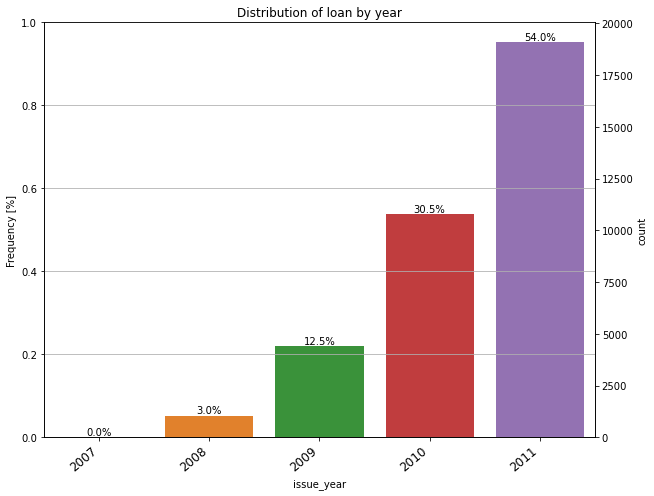

In [35]:
countplot(df, 'issue_year', 'Distribution of loan by year')

### Distribution of loan by emp_type - shows the junior segment of employees take the most number of loans

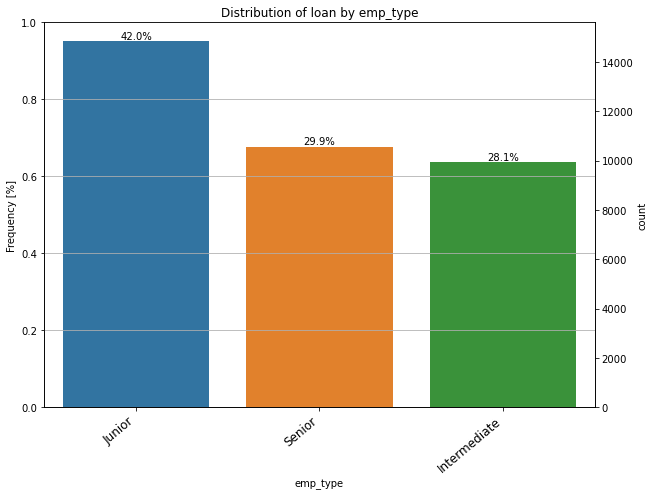

In [36]:
countplot(df, 'emp_type', 'Distribution of loan by emp_type')

### Distribution of loan by emp_length - shows employees with 10+ years take the most number of loans

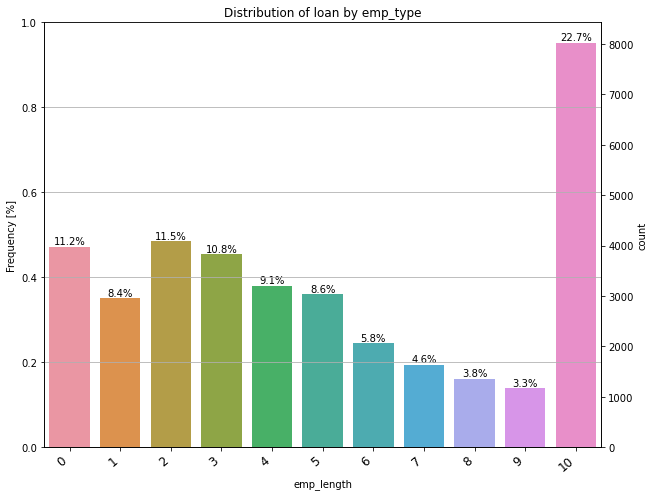

In [37]:
countplot(df, 'emp_length', 'Distribution of loan by emp_type')

### Distribution of loan by term - shows maximum loans taken are of 36 months tenure

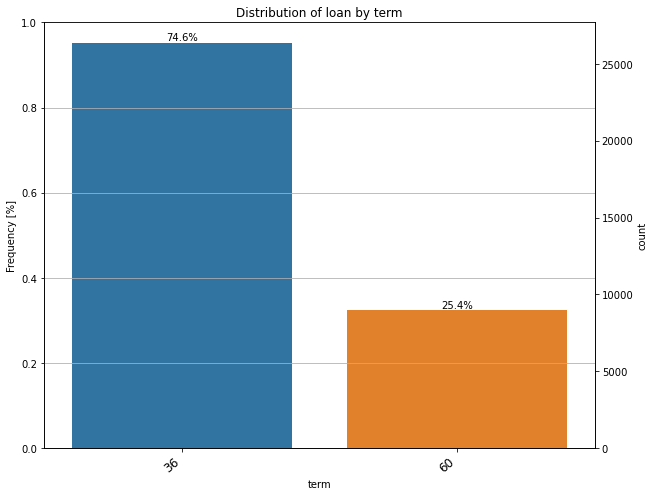

In [38]:
countplot(df, 'term', 'Distribution of loan by term')

### Distribution of loan by purpose - shows maximum loans taken for 'debt_consolidation'

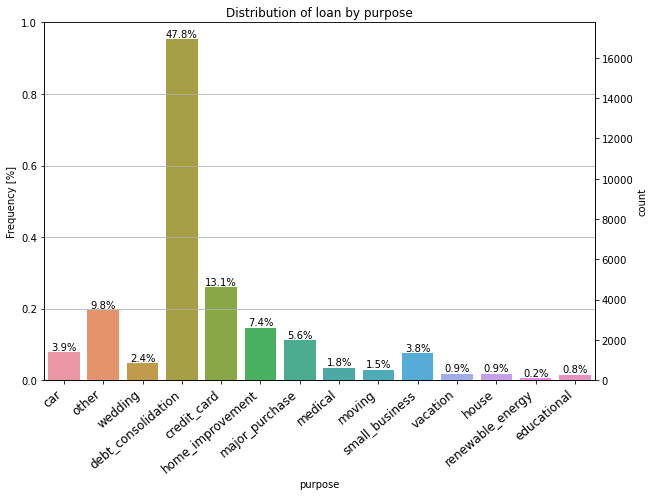

In [39]:
countplot(df, 'purpose', 'Distribution of loan by purpose')

# 2) Bivariate Analysis
#### we will use 'loan_status' as the target column and compare it with various other parameters which we think that contributes in the loan default

### Distribution of loan_status by int_rate - shows the loans with interest rate < 11% (approximately) have a higher chance of not defaulting

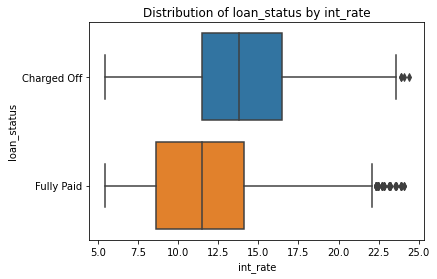

In [40]:
sns.boxplot(x ='int_rate', y = 'loan_status', data = df)
plt.title("Distribution of loan_status by int_rate")
plt.show()

### Distribution of loan_status by term - shows the loans with term > 36 months have a higher chance of defaulting

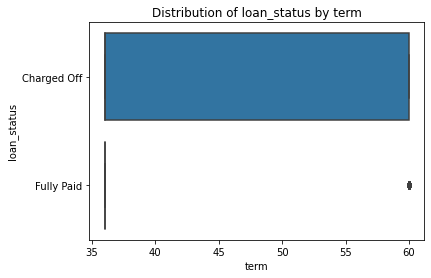

In [41]:
sns.boxplot(x ='term', y = 'loan_status', data = df)
plt.title("Distribution of loan_status by term")
plt.show()

### Distribution of loan_status by emp_length - shows the median of chargedOff is higer than that of fully paid, i.e. employees having higher exp length tend to default more

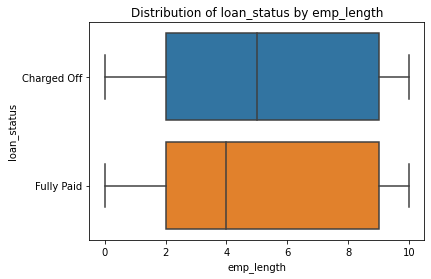

In [42]:
sns.boxplot(x ='emp_length', y = 'loan_status', data = df)
plt.title("Distribution of loan_status by emp_length")
plt.show()

### Distribution of loan_status by term - shows that employees with higher net loan/income ratio have a higher chance of defaulting

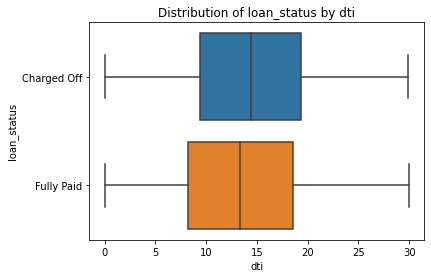

In [43]:
sns.boxplot(x ='dti', y = 'loan_status', data = df)
plt.title("Distribution of loan_status by dti")
plt.show()

### Distribution of loan_status by loan_amnt - shows that higher loan amounts (15000 and above) have a higher chance of defaulting

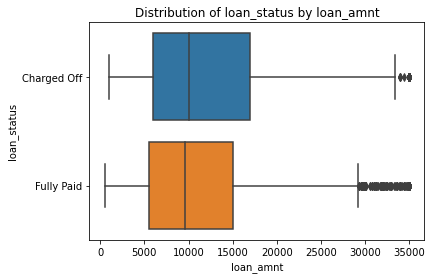

In [44]:
sns.boxplot(x ='loan_amnt', y = 'loan_status', data = df)
plt.title("Distribution of loan_status by loan_amnt")
plt.show()

### Distribution of loan_status by verification_status - shows charged-off loans have a good % of applicants which were not verified

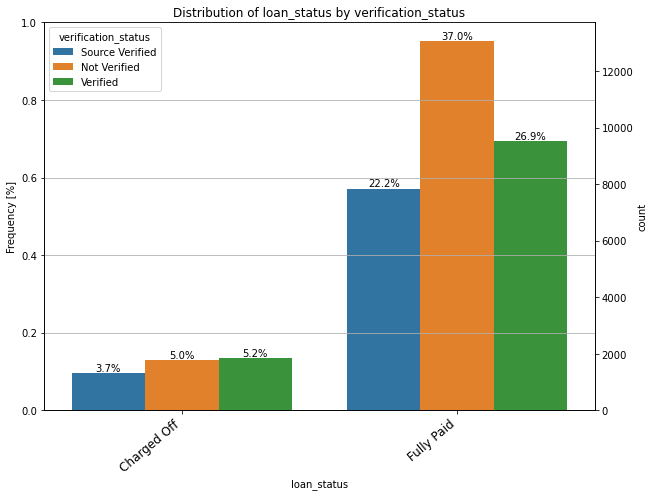

In [45]:
countplot(df, 'loan_status', 'Distribution of loan_status by verification_status', 'verification_status')

### Distribution of loan_status by grade - shows Grade C & B have the most chances of defaulting

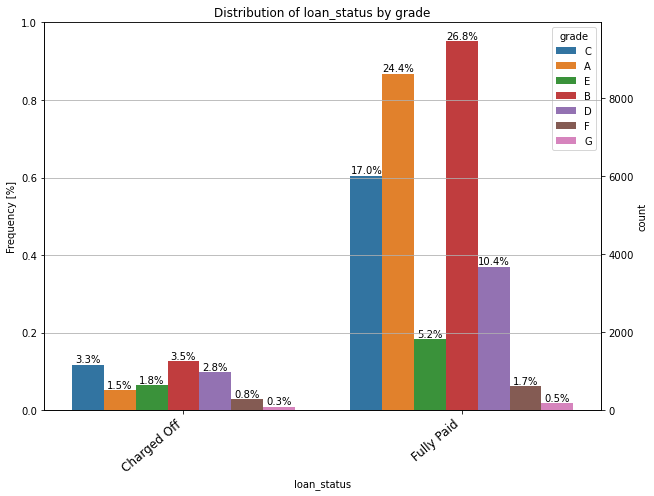

In [46]:
countplot(df, 'loan_status', 'Distribution of loan_status by grade', 'grade')

### Distribution of loan_status by home_ownership - while applicants who have home_ownership as RENT or MORTGAGE take the most number of loans but it has the most chances of defaulting

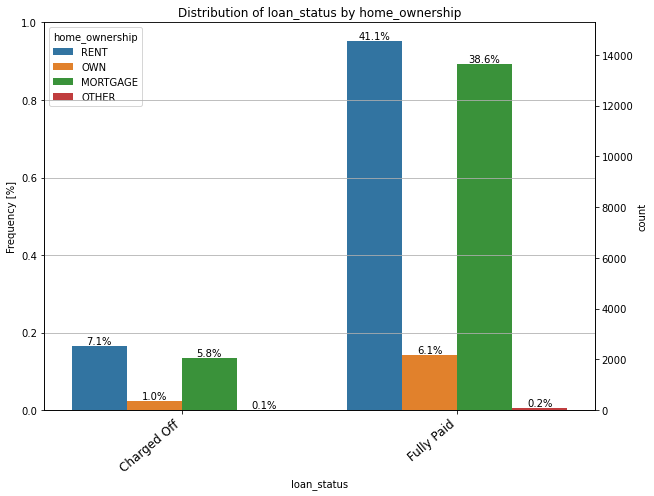

In [47]:
countplot(df, 'loan_status', 'Distribution of loan_status by home_ownership', 'home_ownership')

### Distribution of loan_status by emp_length - applicants with employment of 10+ years who take loan have more chances of defaulting

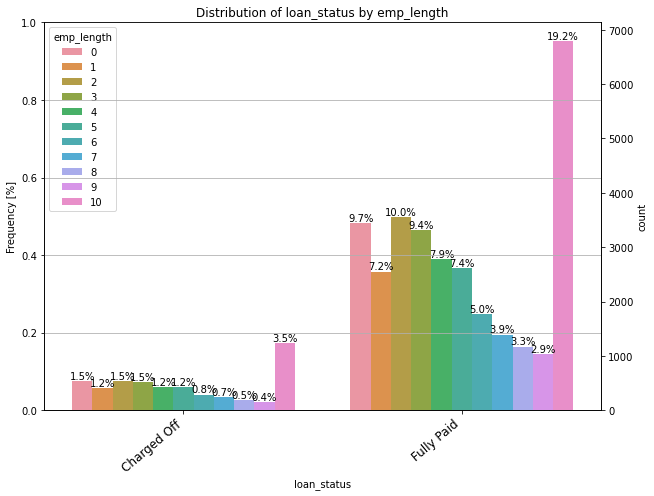

In [48]:
countplot(df, 'loan_status', 'Distribution of loan_status by emp_length', 'emp_length')

### Distribution of loan_status by emp_type - total number of applicants with employment in the segment (0-3 years) who taken loan have defaulted the most as compared to the other segmented data

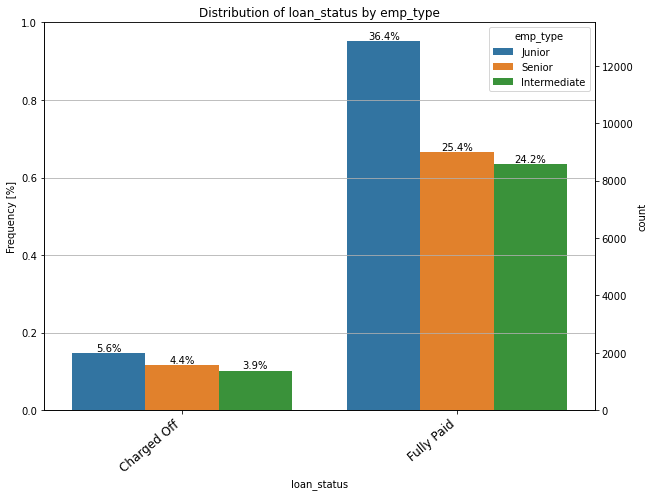

In [49]:
countplot(df, 'loan_status', 'Distribution of loan_status by emp_type', 'emp_type')

### Distribution of loan_status by purpose - applicants with purpose as 'debt_consolidation' have taken the most number of loans but also have a more chance of defaulting the loan

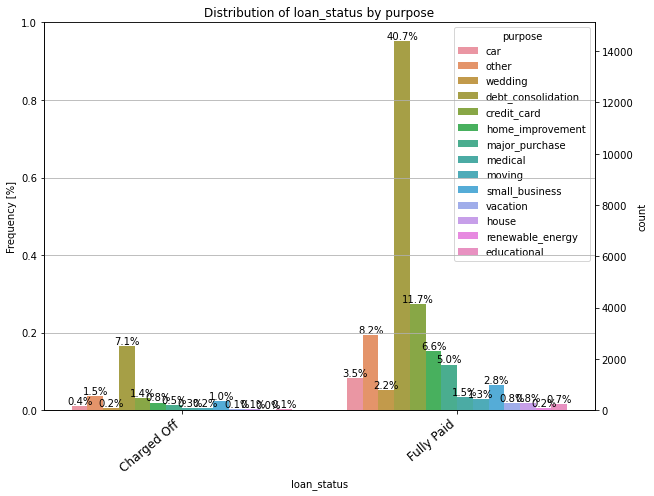

In [50]:
countplot(df, 'loan_status', 'Distribution of loan_status by purpose', 'purpose')

# 3) Correlation analysis

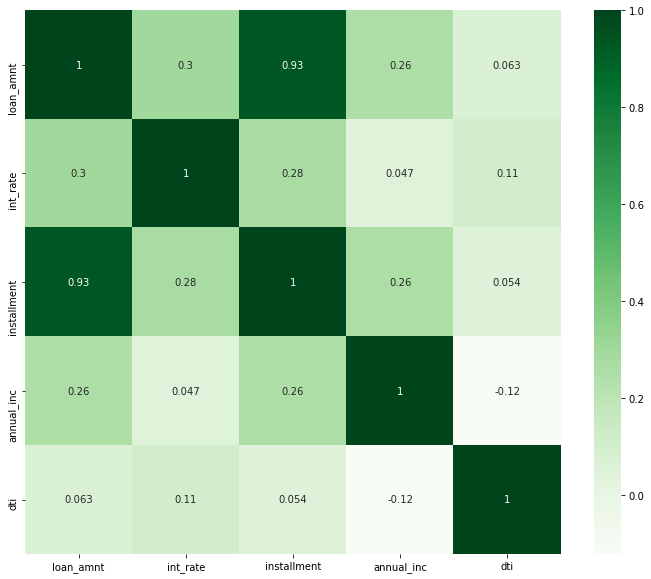

In [51]:
# filtering the numeric columns which seem to have a correlation with each other and creating a heartmap with the correlation
loan_correlation = df.filter(['loan_amnt','int_rate','installment','annual_inc','dti']).corr()
plt.figure(figsize=(12,10))
sns.heatmap(loan_correlation, cmap="Greens", annot=True)
plt.show()